In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

In [4]:
dataset_root = Path('../../Dataset/ingested')

In [5]:
#df_file = sorted(list((dataset_root).glob('features*.csv')))[ 0 ]
df_file = sorted(list((dataset_root).glob('fsfel_features*.csv')))[ 0 ]
df_features = pd.read_csv( df_file, index_col = 'sample_name' )
print(df_file)

../../Dataset/ingested/fsfel_features_0.csv


In [6]:
df_features

,ECDF Percentile Count_0,ECDF Percentile Count_1,ECDF Percentile_0,ECDF Percentile_1,ECDF_0,ECDF_1,ECDF_2,ECDF_3,ECDF_4,ECDF_5,...,Max,Mean,Mean absolute deviation,Median,Median absolute deviation,Min,Root mean square,Skewness,Standard deviation,Variance
sample_name,,,,,,,,,,,,,,,,,,,,,
MAC000002-2012-10,299.0,1196.0,0.000,0.307,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,2.160,0.185783,0.176096,0.117,0.117,0.0,0.309307,2.251715,0.247297,0.061156
MAC000002-2012-11,299.0,1196.0,0.103,0.289,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,1.714,0.230783,0.131420,0.185,0.075,0.0,0.308527,2.557183,0.204764,0.041928
MAC000002-2012-12,299.0,1196.0,0.104,0.293,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,1.692,0.237968,0.138218,0.167,0.072,0.0,0.318145,2.597335,0.211158,0.044588
MAC000002-2013-01,299.0,1196.0,0.109,0.278,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,1.603,0.240858,0.128409,0.196,0.077,0.0,0.321372,2.997614,0.212762,0.045268
MAC000002-2013-02,299.0,1196.0,0.088,0.288,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,2.994,0.255410,0.187892,0.162,0.078,0.0,0.399455,3.095023,0.307132,0.094330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC000036-2012-07,299.0,1196.0,0.006,0.083,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,0.384,0.058311,0.042167,0.045,0.028,0.0,0.085560,1.994728,0.062613,0.003920
MAC000036-2012-08,299.0,1196.0,0.011,0.089,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,0.458,0.062924,0.043852,0.049,0.028,0.0,0.091358,2.116342,0.066232,0.004387
MAC000036-2012-09,299.0,1196.0,0.005,0.080,0.000669,0.001338,0.002007,0.002676,0.003344,0.004013,...,0.427,0.054996,0.040105,0.044,0.030,0.0,0.080496,2.041536,0.058780,0.003455


In [7]:
data = df_features.values
name="k-means++"


In [8]:
def bench_k_means(data,  n_clusters =  4  ):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=0)

    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, n_clusters, fit_time, estimator[-1].inertia_]
    # Define the metrics which require only the true labels and estimator
    # labels

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    return results

In [9]:
bench_list = []
for n in range(2,12):
    bench_list.append( bench_k_means( data, n  ) )
    

In [11]:
bench_df = ( pd.DataFrame( bench_list, columns = ['Algo','N Clusters','Fit time','Inertia','Silhouette score'] )
             .sort_values('Silhouette score', ascending = False)
           )
bench_df

,Algo,N Clusters,Fit time,Inertia,Silhouette score
0,k-means++,2,0.408826,9017.228617,0.492237
3,k-means++,5,0.372658,4516.631061,0.374692
1,k-means++,3,0.424870,6948.516090,0.246193
2,k-means++,4,0.382389,5547.467294,0.237006
6,k-means++,8,0.381101,2894.423335,0.191888
5,k-means++,7,0.345136,3435.941253,0.186471
9,k-means++,11,0.379499,2076.223279,0.175412
8,k-means++,10,0.433399,2294.761645,0.145159
7,k-means++,9,0.405469,2614.552324,0.108219
4,k-means++,6,0.286071,3871.816681,0.049929


In [18]:
best_n_cluster =  bench_df['N Clusters'].iloc[0]
second_best_n_cluster =  bench_df['N Clusters'].iloc[1]
best_n_cluster, second_best_n_cluster

(2, 5)

In [13]:
def bench_dbscan(data):
    dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None )
    t0 = time()
    estimator = make_pipeline(StandardScaler(), dbscan).fit(data)
    fit_time = time() - t0
    
    labels = dbscan.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print( f'Datapoints {len(data)} Noise points {n_noise_} Clusters {n_clusters_}' )
    
    results = ['DBSCAN', n_clusters_, fit_time ]
    # Define the metrics which require only the true labels and estimator
    # labels

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    return results

In [14]:
pd.DataFrame( [bench_dbscan( data )], columns = ['Algo','N Clusters','Fit time','Silhouette score'] )

Datapoints 698 Noise points 402 Clusters 11


,Algo,N Clusters,Fit time,Silhouette score
0,DBSCAN,11,0.007389,-0.445917


In [15]:
def visualize_clusters_kmeans( reduced_data, n_clusters = 6, reduction_name = 'PCA' ):

    
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4)
    kmeans.fit(reduced_data)
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize = (14,8) )
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering on the dataset ({reduction_name}-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

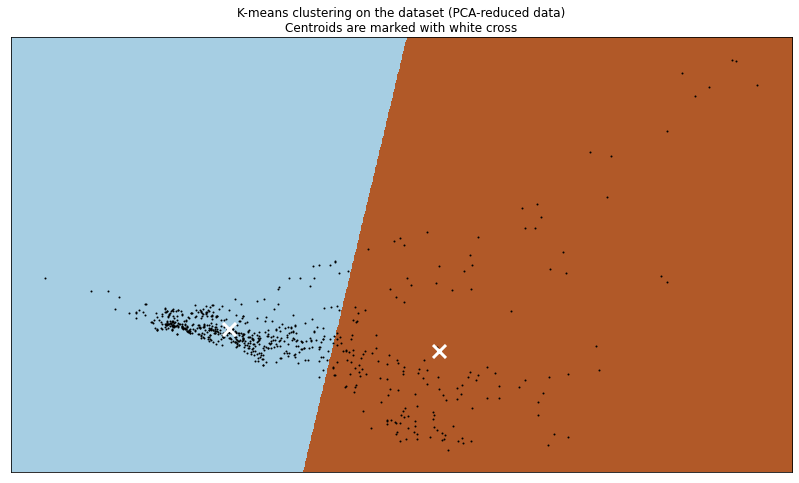

In [16]:
reduced_data = make_pipeline(StandardScaler(), PCA(n_components=2)).fit_transform(data).astype( np.float64 )
visualize_clusters_kmeans( reduced_data, n_clusters = best_n_cluster, reduction_name = 'PCA' )

/home/jupyter-mallibus/.conda/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jupyter-mallibus/.conda/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


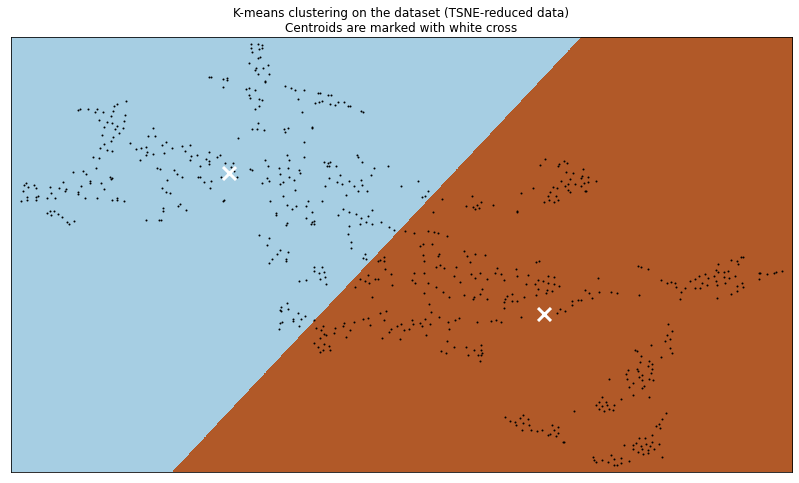

In [19]:
reduced_data = make_pipeline(StandardScaler(), TSNE(n_components=2)).fit_transform(data).astype( np.float64 )
visualize_clusters_kmeans( reduced_data, n_clusters = best_n_cluster, reduction_name = 'TSNE' )

/home/jupyter-mallibus/.conda/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jupyter-mallibus/.conda/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


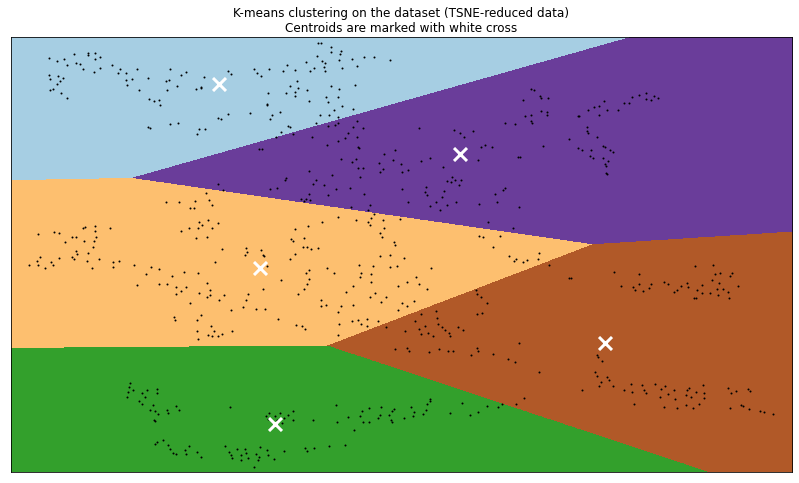

In [21]:
reduced_data = make_pipeline(StandardScaler(), TSNE(n_components=2)).fit_transform(data).astype( np.float64 )
visualize_clusters_kmeans( reduced_data, n_clusters = second_best_n_cluster, reduction_name = 'TSNE' )

# DBSCAN cluster visualization

In [22]:
def visualize_clusters_dbscan( reduced_data, eps=0.3, min_samples=10, reduction_name = 'PCA' ):

    X = reduced_data
    
    
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None ).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

    # #############################################################################
    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure( figsize = (14,8) )
    for k, col in zip(unique_labels, colors):

        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Reduction: {reduction_name} Estimated number of clusters: {n_clusters_}")
    plt.show()

/home/jupyter-mallibus/.conda/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jupyter-mallibus/.conda/envs/py310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Estimated number of clusters: 8
Estimated number of noise points: 18


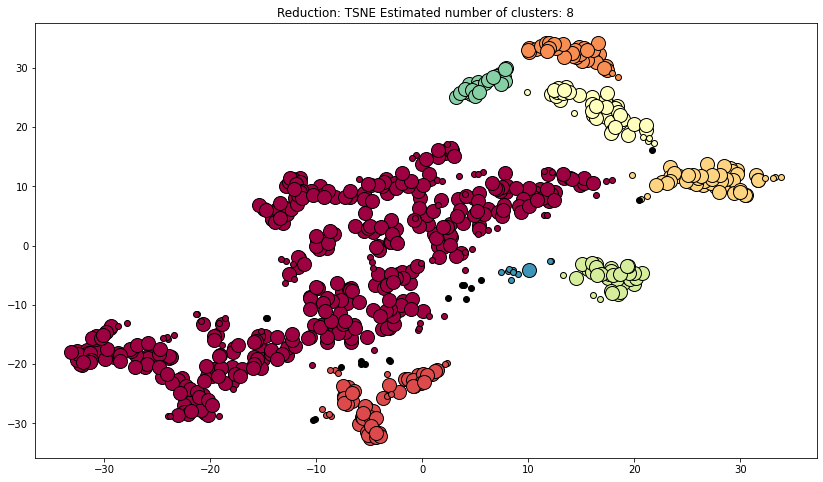

In [24]:
reduced_data = make_pipeline(StandardScaler(), TSNE(n_components=2)).fit_transform(data).astype( np.float64 )
visualize_clusters_dbscan( reduced_data, reduction_name = 'TSNE', eps = 3 )

Estimated number of clusters: 8
Estimated number of noise points: 6


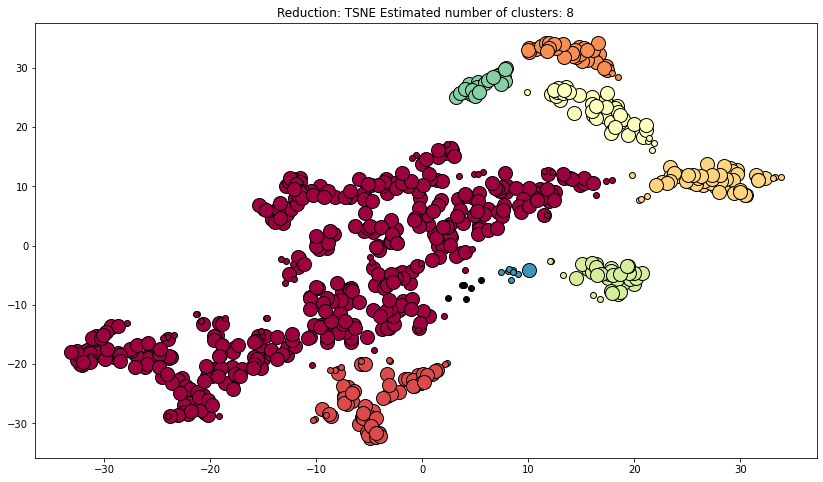

In [25]:
visualize_clusters_dbscan( reduced_data, reduction_name = 'TSNE', eps = 3.2 )

In [26]:
def visualize_clusters_optics( reduced_data, eps=0.3, min_samples=10, reduction_name = 'PCA' ):

    X = reduced_data
    
    db = OPTICS( eps=eps, min_samples=min_samples, cluster_method='dbscan' ).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

    # #############################################################################
    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure( figsize = (14,8) )
    for k, col in zip(unique_labels, colors):

        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k
        xy = X[class_member_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize= 10 if k > -1 else 5,
        )

    plt.title(f"Reduction: {reduction_name} Estimated number of clusters: {n_clusters_}")
    plt.show()

Estimated number of clusters: 8
Estimated number of noise points: 32


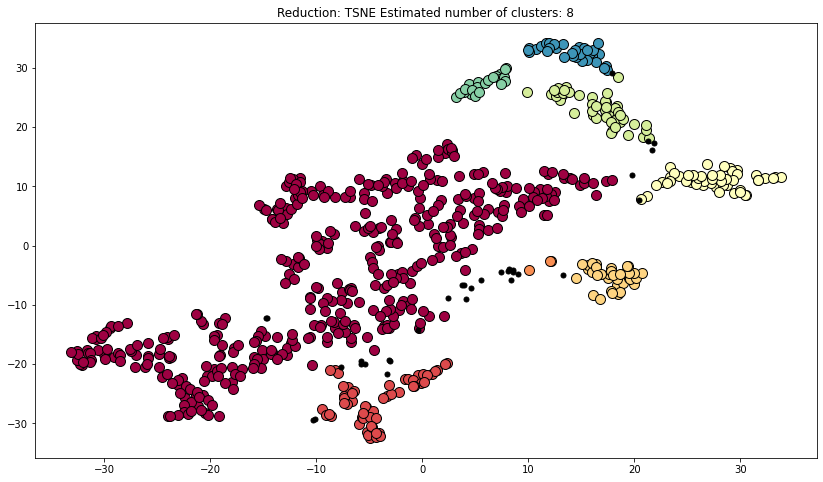

In [27]:
visualize_clusters_optics( reduced_data, reduction_name = 'TSNE', eps = 3 )